In [83]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, f1_score

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


digits = datasets.load_digits()
#Display an image for debugging
def display_image(n):
    # Display the image with the target (digit) displayed above
    image = digits.images[n]
    target = digits.target[n]
    plt.figure(figsize = (1,1))
    plt.imshow(image, cmap='gray')
    plt.title(f'Target: {target}')
    plt.axis('off')
    plt.show()

#Your code here - write an SVC to classify the digits dataset!

In [84]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['targer'] = digits.target
# display(df)
X = digits.data
y = digits.target

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=5)

In [86]:


params_tuning = GridSearchCV(SVC(random_state=15), {
        'C': [1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['auto', 'scale'],
        'class_weight': [None, 'balanced'],
        'decision_function_shape': ['ovo', 'ovr']
    }, scoring= 'f1_macro', cv=5, return_train_score=False)

params_tuning.fit(X_train,y_train)
result = params_tuning.cv_results_

df = pd.DataFrame(result)

display(df)

print(params_tuning.best_params_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009433,0.000552,0.004416,0.000690,1,None,ovo,auto,linear,"{'C': 1, 'class_weight': None, 'decision_funct...",0.967467,0.972764,0.971958,0.978851,0.971772,0.972562,0.003648,49
1,0.012658,0.003590,0.004766,0.001237,1,None,ovo,auto,poly,"{'C': 1, 'class_weight': None, 'decision_funct...",0.983260,0.983445,0.977730,0.977476,0.988323,0.982047,0.004058,13
2,0.052826,0.002408,0.024823,0.001968,1,None,ovo,auto,rbf,"{'C': 1, 'class_weight': None, 'decision_funct...",0.221329,0.281186,0.234983,0.279326,0.208224,0.245009,0.030003,93
3,0.009172,0.000163,0.003857,0.000362,1,None,ovo,scale,linear,"{'C': 1, 'class_weight': None, 'decision_funct...",0.967467,0.972764,0.971958,0.978851,0.971772,0.972562,0.003648,49
4,0.010491,0.000129,0.004368,0.000243,1,None,ovo,scale,poly,"{'C': 1, 'class_weight': None, 'decision_funct...",0.983260,0.989000,0.977730,0.966044,0.983326,0.979872,0.007779,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.010264,0.000680,0.004464,0.000515,1000,balanced,ovr,auto,poly,"{'C': 1000, 'class_weight': 'balanced', 'decis...",0.983260,0.983445,0.977730,0.977476,0.988323,0.982047,0.004058,13
92,0.057763,0.005901,0.025280,0.001034,1000,balanced,ovr,auto,rbf,"{'C': 1000, 'class_weight': 'balanced', 'decis...",0.306225,0.328648,0.286411,0.334323,0.291524,0.309426,0.019234,81
93,0.009286,0.000251,0.003738,0.000198,1000,balanced,ovr,scale,linear,"{'C': 1000, 'class_weight': 'balanced', 'decis...",0.967467,0.972764,0.971958,0.978851,0.971772,0.972562,0.003648,49
94,0.010998,0.000563,0.003980,0.000123,1000,balanced,ovr,scale,poly,"{'C': 1000, 'class_weight': 'balanced', 'decis...",0.983260,0.983445,0.977730,0.977476,0.988323,0.982047,0.004058,13


{'C': 10, 'class_weight': None, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


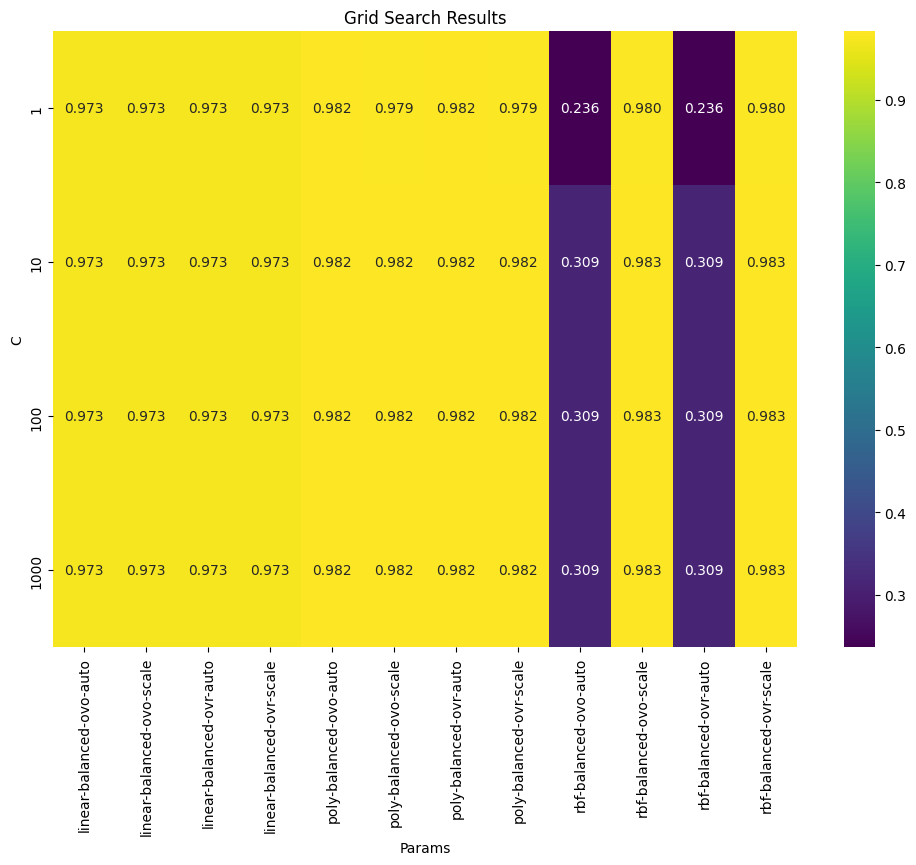

In [87]:
heatmap_data = df.pivot_table(index='param_C', 
                              columns=['param_kernel', 'param_class_weight', 'param_decision_function_shape', 'param_gamma'], 
                              values='mean_test_score')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', cbar=True)
plt.title('Grid Search Results')
plt.xlabel('Params')
plt.ylabel('C')
plt.show()

In [88]:
# C_values = df['param_C'].unique()
# kernel_values = df['param_kernel'].unique()
# gamma_values = df['param_gamma'].unique()

# # Create a grouped bar chart
# bar_width = 0.2
# index = np.arange(len(C_values))

# fig, ax = plt.subplots(figsize=(12, 8))

# for i, gamma_value in enumerate(gamma_values):
#     subset_df = df[df['param_gamma'] == gamma_value]
#     mean_scores = subset_df.groupby(['param_C', 'param_kernel'])['mean_test_score'].mean().values
#     ax.bar(index + i * bar_width, mean_scores, bar_width, label=f'Gamma: {gamma_value}')

# ax.set_xlabel('C and Kernel')
# ax.set_ylabel('Mean Test Score')
# ax.set_title('Grid Search Results')
# ax.set_xticks(index + (len(gamma_values) - 1) * bar_width / 2)
# ax.set_xticklabels([f'C: {C}, Kernel: {kernel}' for C in C_values for kernel in kernel_values])
# ax.legend(title='Gamma')

# plt.show()

In [89]:
# svc_pred = params_tuning.predict(X_test)

# r2 = r2_score(y_test, svc_pred)

# print(r2_score)

In [90]:
defualt_model = SVC()

defualt_model.fit(X_train, y_train)
defualt_model_pred = defualt_model.predict(X_test)

default_model_r2 = f1_score(y_test, defualt_model_pred, average='weighted')

print(default_model_r2)

0.9811442826233119


In [91]:
final_model = SVC(C= 10, class_weight= None, decision_function_shape= 'ovo', gamma= 'scale', kernel= 'rbf')

In [92]:
final_model.fit(X_train, y_train)
final_model_pred = final_model.predict(X_test)

r2 = f1_score(y_test, final_model_pred, average='weighted')

print(r2)

0.9877289911237014
